In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from PIL import Image



In [2]:
mnist = fetch_openml('mnist_784', version='active')
images = mnist.data
labels = mnist.target

shape = images.shape
shape



(70000, 784)

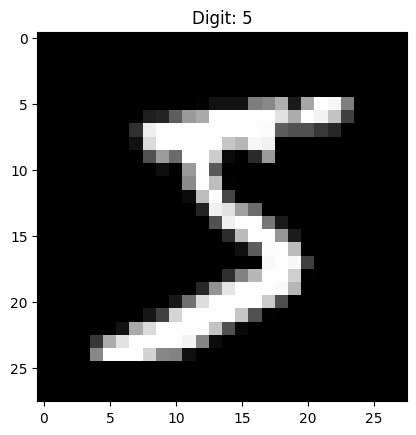

In [3]:
im0 = images.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(im0, cmap='gray', interpolation='nearest')
plt.title(f"Digit: {labels[0]}")
plt.show()

In [68]:
# Prepare a subset of data
size = 5000
rand_idx = np.random.choice(images.shape[0], size)
data_X = images.iloc[rand_idx] / 255.0
Y = labels.iloc[rand_idx]
X_train, X_test, y_train, y_test = train_test_split(data_X, Y, test_size=0.15, random_state=42)

X_train.shape, X_test.shape



((4250, 784), (750, 784))

In [85]:
# create a classifier: a support vector classifier
classifier = svm.SVC(C=1, gamma='scale')
start_time = time.perf_counter()
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)
end_time = time.perf_counter()
print(f"Training time: {end_time - start_time:.4f} seconds")


Training time: 5.1794 seconds


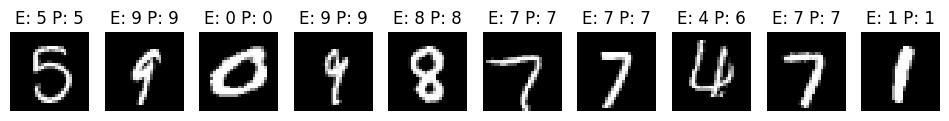

In [86]:
expected = y_test
predicted = classifier.predict(X_test)

# plot n-first expected and predicted values
n = 10
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test.iloc[i].to_numpy().reshape(28, 28), cmap='gray', interpolation='nearest')
    plt.title(f"E: {expected.iloc[i]} P: {predicted[i]}")
    plt.axis('off')



In [87]:
# load an image from a file
file_names = [f'digit{i}.png' for i in range(10)]
img_list = []

for file_name in file_names:
    img = Image.open(file_name).convert('L')
    img_array = 1.0 - (np.array(img) / 255.0)
    img_flat = img_array.flatten()
    img_list.append(img_flat)


In [88]:
# predict the digit
img_df = pd.DataFrame(img_list, columns=X_test.columns)
prediction = classifier.predict(img_df)
print(f"Predicted digits: {prediction}")

Predicted digits: ['0' '1' '2' '3' '9' '5' '6' '2' '8' '3']


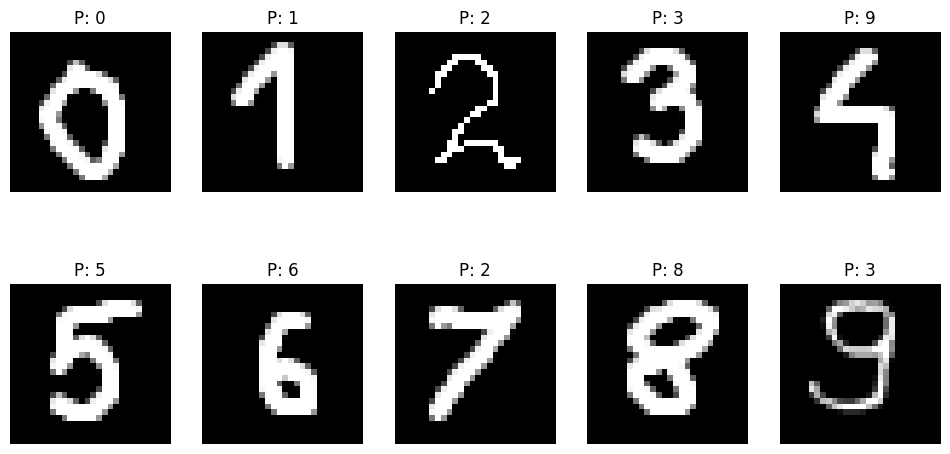

In [89]:
# draw the images from table img_df and predicted values
plt.figure(figsize=(12, 6))
for i in range(len(img_df)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_df.iloc[i].to_numpy().reshape(28, 28), cmap='gray', interpolation='nearest')
    plt.title(f"P: {prediction[i]}")
    plt.axis('off')
plt.show()